In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [7]:
#####################################################################################################

class CosmicWatchMeasurement:
    field_idx = {
        3 : 'times',
        6 : 'energies',
        7 : 'temperatures',
        8 : 'pressures',
        9 : 'dead_times',
        10 : 'coincident'
    }

    def __init__(self,
                 data_file,
                 only_coincident=True,
                 energy_cut=None):
        
        self._read_data(data_file)
        self.temperature_avg, self.temperature_std, self.temperature_max, self.temperature_min = self._get_average_param('temperatures')
        self.pressure_avg, self.pressure_std, self.pressure_max, self.pressure_min = self._get_average_param('pressures')

        if only_coincident:
            self._filter_coincident()
        if energy_cut is not None:
            self._filter_energy(energy_cut)

        self._get_rate()

    def _read_data(self,data_file, max_lines = 5200):
        data = {
            field : [] for idx,field in self.field_idx.items()
        }
        linesread = 0
        with open(data_file, 'r') as f:
            for line in f.readlines():
                if linesread > 5200:
                    break
                if line.startswith('#'):
                    continue
                linesread += 1

                line_data = line.split()
                for idx, field in self.field_idx.items():
                    data[field].append(float(line_data[idx]))

        for field in data:
            setattr(self,field,np.array(data[field]))

        self.total_time = self.times[-1]*1e-3

        self.dead_times = np.cumsum(self.dead_times)*1e-6
        self.times = self.times*1e-3 - self.dead_times

        self.live_time = self.times[-1]

    def _filter_coincident(self):
        mask = self.coincident == 1
        for field in self.field_idx.values():
            setattr(self,field,getattr(self,field)[mask])

    def _filter_energy(self, energy_cut):
        mask = self.energies > energy_cut
        for field in self.field_idx.values():
            setattr(self,field,getattr(self,field)[mask])

    def _get_rate(self):
        self.counts = self.times.size
        interval = self.times[-1] - self.times[0]

        self.rate = (self.counts-1) / interval * 1e3
        self.rate_err = np.sqrt(self.counts-1) / interval * 1e3

        self.rate_sys_err = (5 * self.total_time/3600/24) / interval * 1e3

    def _get_average_param(self,param):
        param_avg = np.mean(getattr(self, param))
        param_std = np.std(getattr(self, param))

        param_max = np.max(getattr(self, param))
        param_min = np.min(getattr(self, param))

        return param_avg, param_std, param_max, param_min

In [8]:
cosmic_watch_data = CosmicWatchMeasurement(data_file="FileC093.txt")
cosmic_watch_data._get_rate()
print(cosmic_watch_data.times)

[  18.454969   20.207032   25.873606   43.413668   47.921835   72.887038
   73.721624   75.679317   77.605836   89.023732   97.78576    99.075915
  100.509515  115.197428  127.470477  138.47447   151.392534  151.958139
  159.112727  160.424008  163.860193  166.254508  180.375074  188.989164
  196.130773  197.70853   205.172762  206.025516  207.5513    210.131272
  218.297015  219.571067  220.549859  225.771005  230.118251  231.960457
  247.083167  251.278715  260.978431  265.940716  268.840969  272.419386
  275.87488   290.19436   290.405661  301.706696  318.10191   326.234869
  329.444435  355.691211  357.482976  370.447932  372.150289  372.549404
  373.438007  382.056656  382.145806  391.794333  396.689348  404.534314
  409.392261  410.324864  417.691136  428.784163  465.523186  485.337374
  499.087994  501.454981  505.231441  506.918093  514.96682   517.087323
  520.741066  521.884887  522.856639  537.983113  563.583781  567.483017
  571.613903  581.974582  582.579178  596.815976  6

In [9]:
# To get the cosmic watch data into bins
interval_bins = range(100*10,2*100*10,10)
counts_for_hist = [0]*100
curr_bin = 2
for time in cosmic_watch_data.times[23*5 + 21:]:
    print(time,curr_bin)
    if curr_bin > 90:
        break
    if interval_bins[curr_bin] < time < interval_bins[curr_bin + 1]:
        counts_for_hist[curr_bin] += 1
    else:
        curr_bin += 1
# print(counts_for_hist)
# print(len(interval_bins),list(interval_bins))
detections = cosmic_watch_data.times

1021.3331290000001 2
1023.9014050000002 2
1027.0849560000001 2
1031.991782 2
1039.1425330000002 3
1039.790226 3
1042.482799 3
1043.206403 4
1048.65931 4
1053.7305669999998 4
1058.49138 5
1059.237137 5
1062.063813 5
1066.789898 6
1082.2255040000002 6
1083.6977080000001 7
1089.146232 8
1093.897133 8
1101.695549 9
1108.334806 10
1109.902698 10
1127.816098 10
1150.312665 11
1150.519968 12
1183.7495490000001 13
1183.957088 14
1217.316123 15
1217.8478750000002 16
1219.402659 17
1220.4444090000002 18
1222.620128 19
1222.731277 20
1224.9482269999999 21
1225.0063770000002 22
1225.303371 22
1228.807652 22
1233.13367 22
1235.1942669999999 23
1254.272066 23
1255.142668 24
1268.517877 25
1281.4724019999999 26
1288.317659 27
1292.1905000000002 28
1307.053523 29
1319.552234 30
1326.414504 31
1339.007956 32
1373.237513 33
1375.304869 34
1392.519397 35
1393.35315 36
1401.825438 37
1410.290444 38
1414.271283 39
1417.9108330000001 40
1422.583522 41
1457.4449980000002 42
1482.84917 43
1490.4306270000002 4

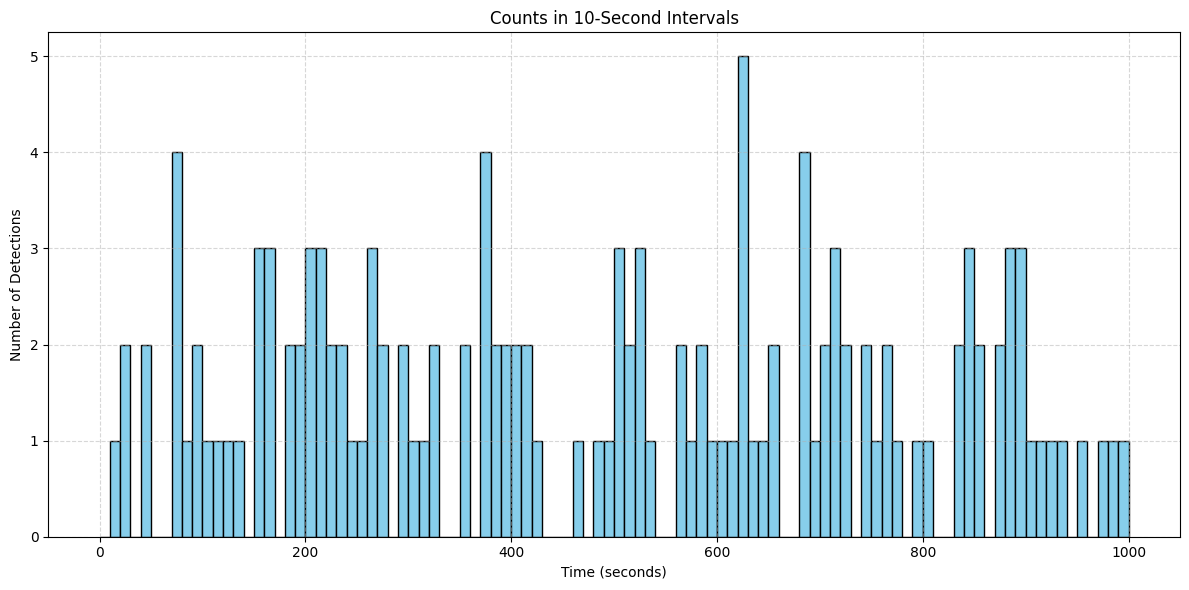

In [10]:
# CHANGE HERE TO CHANGIE BINNING OF DATA SINCE IT DOES IT AUTOMATICALLY!
# 
# detections = cosmic_watch_data.times
# Step 2: Create 100, 10-second interval bins
bins = np.arange(0, 100*10 + 10, 10)  # From 0 to max_time in steps of 10

# Step 3: Plot histogram
plt.figure(figsize=(12, 6))
plt.hist(detections, bins=bins, edgecolor='black', color='skyblue')
plt.title("Counts in 10-Second Intervals")
plt.xlabel("Time (seconds)")
plt.ylabel("Number of Detections")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [11]:
counts, bin_edges = np.histogram(detections, bins=bins)
# Convert to a list of tuples: [(start, end, count), ...]
interval_counts = [
    (int(bin_edges[i]), int(bin_edges[i+1]), int(counts[i]))
    for i in range(len(counts))
]

# # # Optional: print it
# # for start, end, count in interval_counts:
# #     print(f"{start:4d}-{end:4d} sec: {count} detection")
# print(interval_counts)

In [12]:
running_cum_avg = []
for i in range(1,len(counts)):
    r_mean = np.mean(counts[:i])
    running_cum_avg.append(float(r_mean))
print(running_cum_avg)
best_mean = running_cum_avg[-1]


[0.0, 0.5, 1.0, 0.75, 1.0, 0.8333333333333334, 0.7142857142857143, 1.125, 1.1111111111111112, 1.2, 1.1818181818181819, 1.1666666666666667, 1.1538461538461537, 1.1428571428571428, 1.0666666666666667, 1.1875, 1.2941176470588236, 1.2222222222222223, 1.263157894736842, 1.3, 1.380952380952381, 1.4545454545454546, 1.4782608695652173, 1.5, 1.48, 1.4615384615384615, 1.5185185185185186, 1.5357142857142858, 1.4827586206896552, 1.5, 1.4838709677419355, 1.46875, 1.4848484848484849, 1.4411764705882353, 1.4, 1.4166666666666667, 1.3783783783783783, 1.4473684210526316, 1.4615384615384615, 1.475, 1.4878048780487805, 1.5, 1.4883720930232558, 1.4545454545454546, 1.4222222222222223, 1.391304347826087, 1.3829787234042554, 1.3541666666666667, 1.346938775510204, 1.34, 1.3725490196078431, 1.3846153846153846, 1.4150943396226414, 1.4074074074074074, 1.3818181818181818, 1.3571428571428572, 1.368421052631579, 1.3620689655172413, 1.3728813559322033, 1.3666666666666667, 1.360655737704918, 1.3548387096774193, 1.4126

In [13]:
# bin_errors = np.sqrt(counts)
# manually append 0 because first bin has no counts, divide by zero error
running_uncertainty = [np.sqrt(best_mean)] * (len(counts)-1)
for i in range(0,len(counts)-1):
    running_uncertainty[i] = running_uncertainty[i]**2 /  (i+1)
    # print(counts[1:i])
    # # print(np.sum(1/counts[:i]))
    # r_uncert = np.sqrt(1/np.sum([1/x for x in counts[1:i]]))
    # running_uncertainty.append(float(r_uncert))
best_uncert = running_uncertainty[-1]
print(best_mean, best_uncert)

1.3636363636363635 0.013774104683195591


Text(0.5, 0, 'Interval Number (10s)')

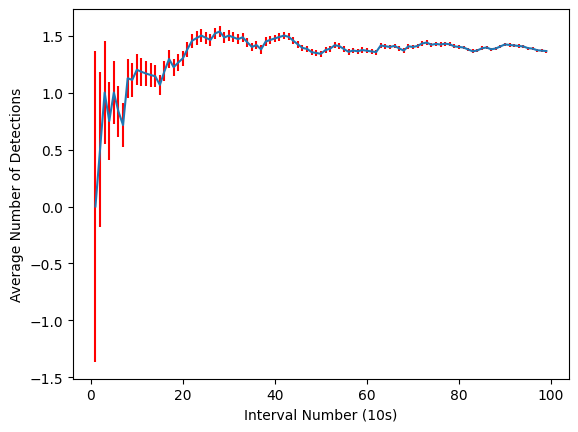

In [14]:
plt.errorbar(range(1,len(counts)),running_cum_avg, yerr = running_uncertainty, ecolor='red')
plt.ylabel('Average Number of Detections')
plt.xlabel('Interval Number (10s)')

Text(0, 0.5, 'Frequency')

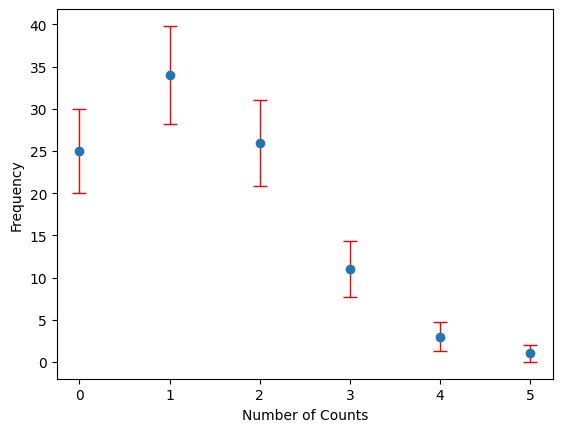

In [15]:
frequencies = {0:0,1:0,2:0,3:0,4:0,5:0}
for bin_count in counts:
    frequencies[bin_count] += 1

plt.errorbar(list(frequencies.keys()),list(frequencies.values()),yerr = list(np.sqrt(x) for x in frequencies.values()),fmt='o', capsize=5, ecolor='red', elinewidth=1)
plt.xlabel("Number of Counts")
plt.ylabel("Frequency")

In [16]:
def poisson_dist(x, mu):
    return mu**x/math.factorial(x) * np.exp(-mu)

def gaussian(x, mu):
    return 1/np.sqrt(2*math.pi*mu) * np.exp(-((x - mu)/2*mu)**2)

0.3864946685740738


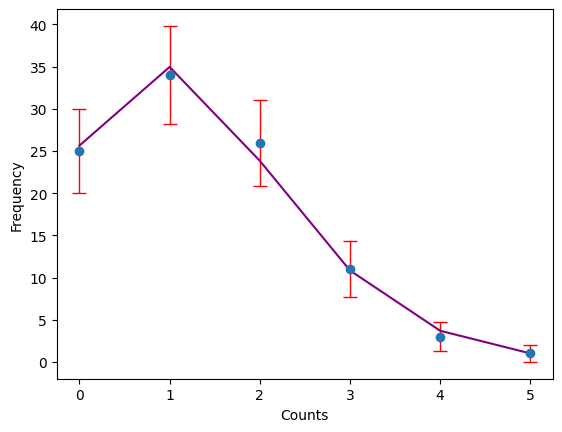

In [17]:
normalization_factor = 100/sum([poisson_dist(x,mu=best_mean) for x in frequencies.keys()])
poisson_fit = [normalization_factor*poisson_dist(x,mu=best_mean) for x in frequencies.keys()]
plt.errorbar(list(frequencies.keys()),list(frequencies.values()),yerr = list(np.sqrt(x) for x in frequencies.values()),fmt='o', capsize=5, ecolor='red', elinewidth=1)
plt.plot(list(frequencies.keys()),poisson_fit, color = 'purple')
poisson_chi2 = sum([1/(list(np.sqrt(x) for x in frequencies.values())[i])**2 * (poisson_fit[i] - list(frequencies.values())[i])**2 for i in range(0,5)])
plt.xlabel("Counts")
plt.ylabel("Frequency")
print(poisson_chi2)

5.585879749947527


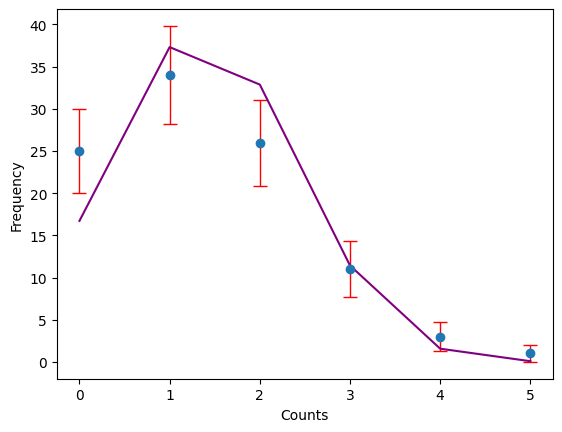

In [18]:
normalization_factor = 100/sum([gaussian(x,best_mean) for x in frequencies.keys()])
gaussian_fit = [normalization_factor*gaussian(x,mu=best_mean) for x in frequencies.keys()]
plt.errorbar(list(frequencies.keys()),list(frequencies.values()),yerr = list(np.sqrt(x) for x in frequencies.values()),fmt='o', capsize=5, ecolor='red', elinewidth=1)
plt.plot(list(frequencies.keys()),[normalization_factor*gaussian(x,best_mean) for x in frequencies.keys()], color = 'purple')
gaussian_chi2 = sum([1/(list(np.sqrt(x) for x in frequencies.values())[i])**2 * (gaussian_fit[i] - list(frequencies.values())[i])**2 for i in range(0,5)])
plt.xlabel("Counts")
plt.ylabel("Frequency")
print(gaussian_chi2)

In [19]:
list = [154.0,154.3,153.7]
print(np.mean(list)/100)
print(np.std(list)/100)

1.54
0.002449489742783271
